# Aula 2: Análise de Frequência - Resumindo e Entendendo os Dados

Nesta aula, vamos mergulhar na **Análise de Frequência**, uma das primeiras e mais poderosas ferramentas da estatística descritiva. Ela nos ajuda a transformar dados brutos em informações organizadas, revelando padrões e a distribuição de valores em nosso dataset.

Abordaremos dois tipos principais de análise de frequência:
1.  **Distribuição de Frequência para uma variável (Univariada)**: Para entender a composição de uma única característica.
2.  **Distribuição de Frequência para duas variáveis (Bivariada)**: Para explorar a relação entre duas características.

## Configuração Inicial

Como sempre, começamos importando nossas bibliotecas e carregando o dataset de e-commerce.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configurações de visualização para os gráficos
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 7)

# Carregando o dataset
url = 'https://raw.githubusercontent.com/alura-cursos/Estatisticas-Python-frequencias-medidas/refs/heads/main/dados/vendas_ecommerce.csv'
df = pd.read_csv(url)

## 1. Distribuição de Frequência para Uma Variável

Esta técnica nos permite contar quantas vezes cada valor ou categoria aparece em uma coluna. É a forma mais simples de resumir dados categóricos.

A distribuição de frequência é uma ferramenta fundamental da estatística descritiva que organiza e resume um conjunto de dados. Em sua forma mais simples, para uma única variável, ela é uma tabela ou gráfico que mostra quantas vezes cada valor ou categoria aparece no seu dataset.
Pense nela como um "censo" dos seus dados. Em vez de olhar para uma lista com 200.000 compras, você pode ver um resumo claro: "Eletrônicos: 36.060 compras, Roupas: 27.917 compras", etc. Isso transforma uma montanha de dados brutos em um insight imediato.

Pré-requisitos para dominar o tema:
 -Tipos de Variáveis: Saber a diferença entre dados qualitativos (nominais e ordinais) e quantitativos. A análise de frequência é mais diretamente aplicada a variáveis qualitativas e quantitativas discretas.
- Manipulação Básica de Dados: Conhecimentos em Python com a biblioteca pandas para selecionar colunas e agregar dados.


### 1.1. Frequência Absoluta

A **frequência absoluta** é simplesmente a contagem direta de ocorrências de cada categoria. Vamos usar a variável `regiao_cliente` como exemplo.

É a contagem direta do número de vezes que uma categoria específica (i) aparece nos dados.
Fórmula: fᵢ = Contagem(valorᵢ)
Interpretação: fᵢ nos diz o número bruto de observações para a categoria i. Por exemplo, se fᵢ para "Eletrônicos" é 36.060, significa que essa categoria aparece 36.060 vezes no dataset.

In [2]:
# A função .value_counts() do pandas é perfeita para calcular a frequência absoluta
freq_abs_regiao = df['regiao_cliente'].value_counts()

print("Frequência Absoluta das Vendas por Região:")
print(freq_abs_regiao)

Frequência Absoluta das Vendas por Região:
regiao_cliente
Sudeste         64603
Nordeste        49567
Sul             36602
Centro-Oeste    31567
Norte           17661
Name: count, dtype: int64


### 1.2. Frequência Relativa e Percentual

A **frequência relativa** expressa a proporção de cada categoria em relação ao total. Ela é útil para comparar distribuições entre datasets de tamanhos diferentes. A frequência percentual é apenas a frequência relativa multiplicada por 100.

**Fórmula**: `Frequência Relativa = Frequência Absoluta da Categoria / Total de Observações`

É a proporção da frequência absoluta de uma categoria em relação ao número total de observações (n).
- Fórmula: frᵢ = fᵢ / n
- Interpretação: frᵢ nos dá o peso de cada categoria. Uma frequência relativa de 0.18 para "Eletrônicos" significa que 18% de todas as compras registradas foram dessa categoria.

In [3]:
# Para obter a frequência relativa, usamos o argumento normalize=True

freq_rel_regiao = df['regiao_cliente'].value_counts(normalize=True)

print("Frequência Relativa (%):")
print(round(freq_rel_regiao * 100, 2))

Frequência Relativa (%):
regiao_cliente
Sudeste         32.30
Nordeste        24.78
Sul             18.30
Centro-Oeste    15.78
Norte            8.83
Name: proportion, dtype: float64


### 1.3. Tabela de Frequência Completa e Visualização

Para uma análise completa, costumamos juntar as frequências absoluta e relativa em uma única tabela. Depois, visualizamos essa tabela com um gráfico de barras para facilitar a interpretação.

Tabela de Frequência Completa por Região:
                Frequência Absoluta  Frequência %
regiao_cliente                                   
Sudeste                       64603         32.30
Nordeste                      49567         24.78
Sul                           36602         18.30
Centro-Oeste                  31567         15.78
Norte                         17661          8.83


C:\Users\junio\AppData\Local\Temp\ipykernel_36584\3855129294.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tabela_frequencia_regiao.index, y=tabela_frequencia_regiao['Frequência Absoluta'], palette='viridis' )


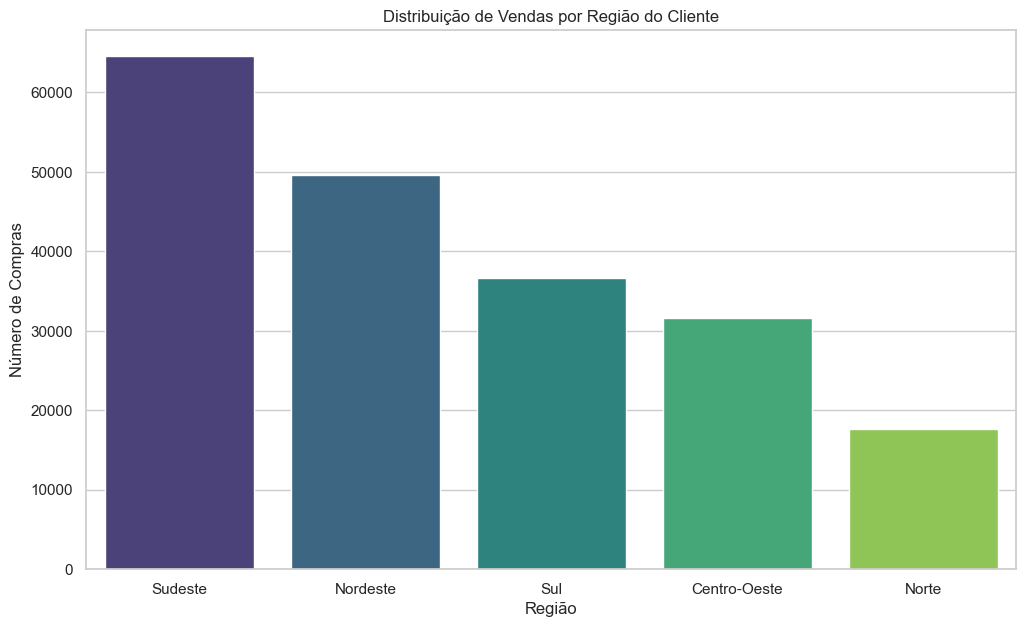

In [12]:
# Criando um DataFrame para a tabela de frequência completa
tabela_frequencia_regiao = pd.DataFrame({
    'Frequência Absoluta': freq_abs_regiao,
    'Frequência %': round(freq_rel_regiao * 100, 2)
})

print("Tabela de Frequência Completa por Região:")
print(tabela_frequencia_regiao)

# Visualizando a distribuição com um gráfico de barras
sns.barplot(x=tabela_frequencia_regiao.index, y=tabela_frequencia_regiao['Frequência Absoluta'], palette='viridis' )
plt.title('Distribuição de Vendas por Região do Cliente')
plt.xlabel('Região')
plt.ylabel('Número de Compras')
plt.show()

## 2. Distribuição de Frequência para Duas Variáveis

Aqui, o objetivo é entender como duas variáveis categóricas se relacionam. A ferramenta principal para isso é a **Tabela de Contingência**.

### 2.1. Tabela de Contingência (Frequências Absolutas)

Uma tabela de contingência, ou tabela cruzada (*crosstab*), mostra a frequência conjunta de duas ou mais variáveis. Cada célula da tabela mostra a contagem de observações para uma combinação específica de categorias.

Vamos analisar a relação entre a `regiao_cliente` e a `avaliacao`.

Tabela de Contingência: Avaliação por Região
avaliacao_label  Péssimo  Ruim  Regular    Bom  Ótimo
regiao_cliente                                       
Centro-Oeste        5005  4473     3587   7378  11124
Nordeste            7880  6809     5701  11834  17343
Norte               2757  2545     3811   3058   5490
Sudeste             9838  8810    13454  11845  20656
Sul                 6943  5602     5729   6865  11463


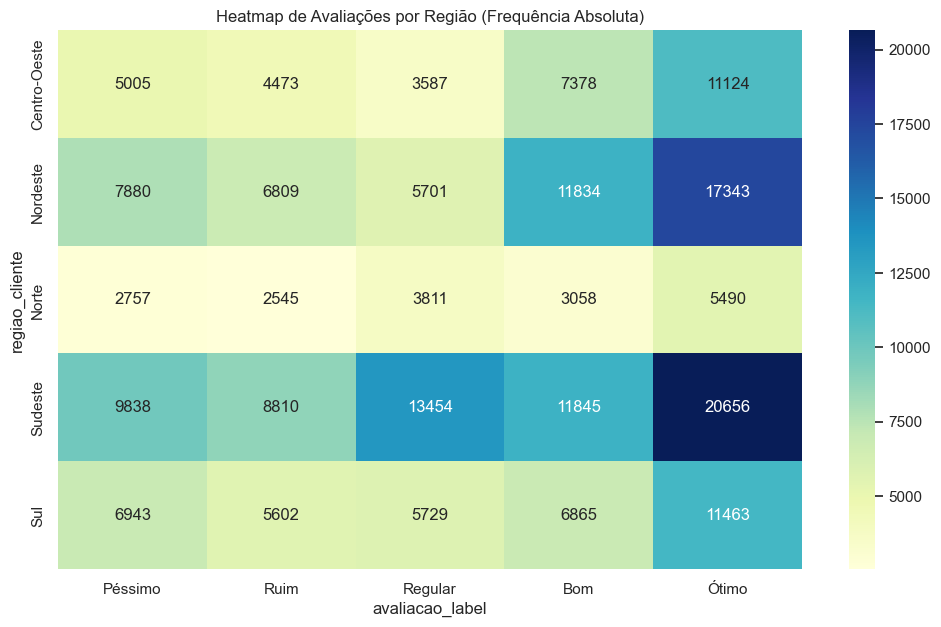

In [6]:
# Para facilitar a leitura, vamos criar a coluna de rótulos para a avaliação
df['avaliacao_label'] = df['avaliacao'].map({1: 'Péssimo', 2: 'Ruim', 3: 'Regular', 4: 'Bom', 5: 'Ótimo'})
df['avaliacao_label'] = pd.Categorical(df['avaliacao_label'], categories=['Péssimo', 'Ruim', 'Regular', 'Bom', 'Ótimo'], ordered=True)

# Usamos a função pd.crosstab para criar a tabela de contingência
tabela_contingencia = pd.crosstab(df['regiao_cliente'], df['avaliacao_label'])

print("Tabela de Contingência: Avaliação por Região")
print(tabela_contingencia)

# Um heatmap é uma excelente forma de visualizar uma tabela de contingência
sns.heatmap(tabela_contingencia, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Heatmap de Avaliações por Região (Frequência Absoluta)')
plt.show()

### 2.2. Tabela Cruzada com Agregação

Podemos estender o conceito da tabela cruzada para não apenas contar ocorrências, mas também para calcular uma estatística de uma terceira variável (numérica) para cada combinação de categorias.

Por exemplo, qual é o **ticket médio** (`total_compra`) para cada `sexo_biologico` em cada `regiao_cliente`?

In [ ]:
# Usamos o crosstab com os argumentos 'values' e 'aggfunc'
ticket_medio_crosstab = pd.crosstab(
    index=df['sexo_biologico'], 
    columns=df['regiao_cliente'], 
    values=df['total_compra'], 
    aggfunc='mean'
)

print("Tabela Cruzada: Ticket Médio (R$) por Sexo e Região")
print(round(ticket_medio_crosstab, 2))

# O heatmap também é perfeito para visualizar essa matriz de médias
sns.heatmap(ticket_medio_crosstab, annot=True, fmt='.0f', cmap='coolwarm')
plt.title('Heatmap do Ticket Médio (R$) por Sexo e Região')
plt.show()

## Conclusão

A análise de frequência é uma técnica versátil e poderosa.

- **Distribuições de frequência univariadas** nos ajudam a entender a composição de uma única variável.
- **Tabelas de contingência** revelam as relações e padrões entre duas variáveis categóricas.
- **Tabelas cruzadas com agregação** nos permitem resumir uma variável numérica através de diferentes segmentos do nosso público.

Dominar essas técnicas é essencial para extrair os primeiros e, muitas vezes, mais importantes insights de um dataset.